# Problem Set 4

In [2]:
# Standard setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.xkcd()

## Problem 4.1

In [3]:
def simple_func(a, b):
    '''Returns the result of 6 * a + b ** 3. Accepts 2 numeric types or numeric numpy arrays and returns a single value or numpy array.'''
    return 6 * a + b ** 3

simple_func_2 = lambda a, b:6 * a + b ** 3

print(simple_func(5, 4))
print(simple_func_2(5, 4))

94
94


## Problem 4.2

In [4]:
rand_array = np.random.rand(100)
rand_array.sort()
print(f"Sum: {rand_array.sum()}, Average: {rand_array.mean()}, Variance: {rand_array.var()}, Standard Deviation: {rand_array.std()}")

Sum: 52.51563888985817, Average: 0.5251563888985816, Variance: 0.07123060194909923, Standard Deviation: 0.26689061794881297


## Problem 4.3

In [5]:
from scipy.integrate import quad

quad(lambda x: np.e ** (x ** 2), 0, 2)

(16.45262776550723, 1.532446512350018e-11)

## Problem 4.4

In [6]:
print(f"{np.pi :.0E}")
print(f"{np.pi:.4}")
print(f"{np.pi:0>6.3}")

3E+00
3.142
003.14


## Problem 4.5

In [7]:
print(simple_func.__doc__)

Returns the result of 6 * a + b ** 3. Accepts 2 numeric types or numeric numpy arrays and returns a single value or numpy array.


## Problem 4.6

In [8]:
func_cube = lambda x: x ** 3
func_sq = lambda a, b: a ** 2 + b ** 2
func_DNA = lambda dna: ''.join(letter if letter != "T" else "U" for letter in dna.upper())

print(func_cube(25))
print(func_sq(2, 3))
print(func_DNA("actgttgcaaccgaggaccggattccaca"))

15625
13
ACUGUUGCAACCGAGGACCGGAUUCCACA


## Problem 4.7

In [9]:
new_array = np.arange(1, 10).reshape(3, 3).transpose()
new_array

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

## Problem 4.8

(array([12.,  9., 13., 13.,  8.,  3., 13., 10., 10.,  9.]),
 array([-0.98977703, -0.79204052, -0.59430401, -0.39656751, -0.198831  ,
        -0.00109449,  0.19664202,  0.39437852,  0.59211503,  0.78985154,
         0.98758805]),
 <BarContainer object of 10 artists>)

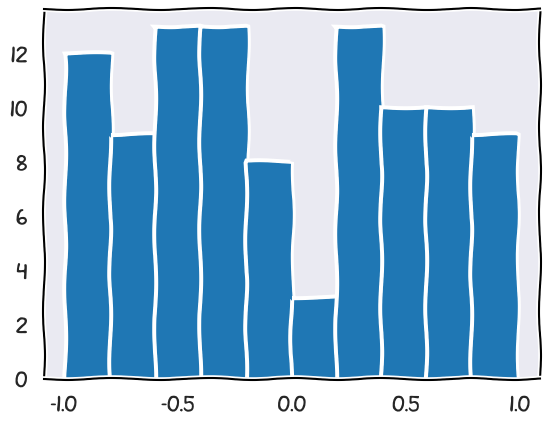

In [10]:
# Use two arrays, one for the actual values and one to determine which values become negative
actual_array = np.random.rand(100)
mask_array = np.random.rand(100)
actual_array[mask_array < 0.5] = -actual_array[mask_array < 0.5]

plt.hist(actual_array)

## Problem 4.9

In [11]:
def my_diff(fx, x, Δx=0.00000000001):
    return (fx(x + Δx) - fx(x)) / Δx

print(my_diff(lambda x: x ** 2, 2))
print(my_diff(lambda x: np.sin(x), np.pi))

4.000000330961484
-1.000000082740371


## Problem 4.10

In [12]:
def axn(x, a=3, n=2):
    return a * (x ** n)

print(axn(3))
print(axn(3, 2, 5))

27
486


## Problem 4.11

(array([ 312.,  511.,  757., 1226., 1466., 2948., 1176.,  791.,  492.,
         321.]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <BarContainer object of 10 artists>)

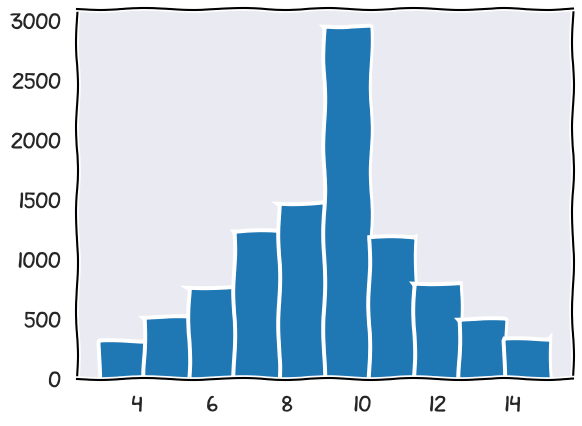

In [13]:
def my_three_dice(n):
    return np.fromiter((sum(np.random.randint(1, 6, 3)) for _ in range(n)), int)

dataset = my_three_dice(10000)
fig, ax = plt.subplots()
ax.hist(dataset)

## Problem 4.12

In [14]:
def my_int_trap(fx, a, b, n=10000):
    # n is the number of bins
    Y = np.fromiter((fx(i) for i in np.linspace(a, b, n + 1)), float)
    Δx = (b - a) / n
    return sum((Δx * ((Y[i] + Y[i + 1]) / 2)) for i in range(n))

my_int_trap(lambda x: x ** 2, 2, 8)

168.0000003600002

## Problem 4.13

/tmp/ipykernel_24122/350757318.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


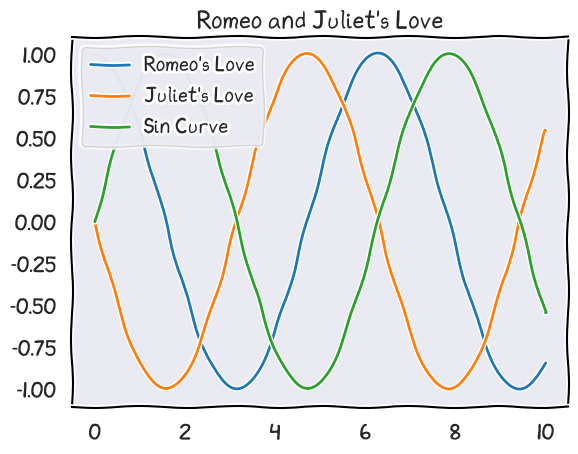

In [15]:
def dRdt(J, k1 = 1):
    return J * k1

def dJdt(R, k2 = 1):
    return -(R * k2)

max_time = 10
dt = 0.001
R, J, k1, k2 = 1, 0, 1, 1

love_dataset = {"time": np.arange(0, max_time, dt), "Romeo": [], "Juliet": []}

for time in love_dataset["time"]:
    love_dataset["Romeo"].append(R)
    love_dataset["Juliet"].append(J)

    R_new = R + dRdt(J, k1) * dt
    J_new = J + dJdt(R, k2) * dt

    R, J = R_new, J_new

fig2, ax2 = plt.subplots()
ax2.plot(love_dataset["time"], love_dataset["Romeo"], label="Romeo's Love")
ax2.plot(love_dataset["time"], love_dataset["Juliet"], label="Juliet's Love")
ax2.plot(np.linspace(0, 10, 1000), np.sin(np.linspace(0, 10, 1000)), label="Sin Curve")
ax2.set_title("Romeo and Juliet's Love")
ax2.legend()
fig2.show()

## Problem 4.14

/tmp/ipykernel_24122/3704613495.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


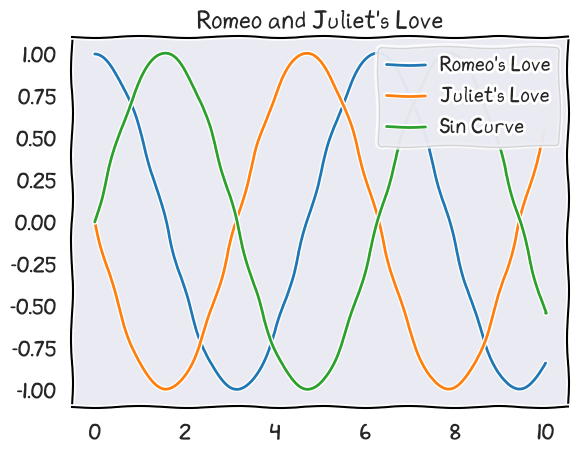

In [16]:
from scipy.integrate import odeint

max_time = 10
dt = 0.001
R, J, k1, k2 = 1, 0, 1, 1

def dydt(y, t, k1, k2):
    R, J = y

    dRdt = J * k1
    dJdt = -(R * k2)

    return dRdt, dJdt

data = {"time": np.arange(0, max_time, dt), "Romeo": None, "Juliet": None}

results = odeint(func=dydt, y0=[R, J], t=data["time"], args=(k1, k2))

data["Romeo"] = results[:, 0]
data["Juliet"] = results[:, 1]

fig3, ax3 = plt.subplots()
ax3.plot(data["time"], data["Romeo"], label="Romeo's Love")
ax3.plot(data["time"], data["Juliet"], label="Juliet's Love")
ax3.plot(np.linspace(0, max_time, 1000), np.sin(np.linspace(0, max_time, 1000)), label="Sin Curve")
ax3.set_title("Romeo and Juliet's Love")
ax3.legend()
fig3.show()

## Problem 4.15

In [45]:
# Helper functions for tic-tac-toe
# Assumptions: grid is an 2-dimensional NumPy array with equal sides of length n
# There are 2 players in the game, denoted with +1 and -1
# A win happens when a row, column or diagonal is filled with the same player's marks

def generate_grid(n):
    return np.zeros((n, n), int)

def add_mark(grid, x, y, marker):
    # Check if the grid contains a mark first
    if grid[y, x] != 0:
        return None

    # Add the new mark
    grid_new = grid.copy()
    grid_new[y, x] = marker
    return grid_new

def check_win(grid):
    # Check for rows and columns
    grid_len = len(grid)

    for i in range(grid_len):
        if np.sum(grid[i, :]) == grid_len or np.sum(grid[:, i]) == grid_len:
            return 1
        elif np.sum(grid[i, :]) == -grid_len or np.sum(grid[:, i]) == -grid_len:
            return -1

    # Check for diagonals
    if np.sum(grid.diagonal()) == grid_len or np.sum(np.fliplr(grid).diagonal()) == grid_len:
        return 1
    elif np.sum(grid.diagonal()) == -grid_len or np.sum(np.fliplr(grid).diagonal()) == -grid_len:
        return -1

    # Return false if all checks fail
    return 0

def print_grid(grid):
    # Generate a nice-looking tic tac toe grid based on the internal grid
    print(grid)

In [ ]:
grid_size = 3
grid = generate_grid(grid_size)

# Gameplay Loop
for i in range(len(grid) ** 2):
    # Print the current board state
    print_grid(grid)
    print("")

    # Determine current turn
    if i % 2 == 0:
        player = 1
        print("Player 1's turn")
    else:
        player = -1
        print("Player 2's turn")

    # Add a new mark to the grid
    while True:
        # Get x and y coordinates from the player
        try:
            x_input = int(input("X Coordinate:")) - 1
            y_input = int(input("Y Coordinate:")) - 1
        except ValueError:
            print("Invalid input!")
            continue
        except Exception as e:
            print(e)
            continue

        # Verify if input is valid
        if not ((0 <= x_input <= grid_size) or (0 <= y_input <= grid_size)):
            print("Coordinate is not within range!")
            continue

        # Place the mark based on turn order
        new_grid = add_mark(grid, x_input, y_input, player)

        # If mark already in location, try again
        if new_grid is None:
            print("Location already occupied!")
            continue

        # If the position is valid, break the loop
        grid = new_grid
        break

    # Check for a win
    possible_winner = check_win(grid)
    if possible_winner == 1:
        print("Player 1 wins!")
        break
    elif possible_winner == -1:
        print("Player 2 wins!")
        break

else:
    # If no one wins within the gameplay loop, it's a tie
    print("It's a tie!")